<a href="https://colab.research.google.com/github/chauhanavneesh09/CODSOFT/blob/main/CodSoft_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 3 : IRIS FLOWER CLASSIFICATION**


*   The Iris flower dataset consists of three species: setosa,
    versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements
    of Iris flowers categorized by their respective species. Your
    objective is to train a machine learning model that can learn from
    these measurements and accurately classify the Iris flowers into
    their respective species.
*   Use the Iris dataset to develop a model that can classify iris
    flowers into different species based on their sepal and petal
    measurements. This dataset is widely used for introductory
    classification tasks.



**Import necessary liabraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load Iris Flower dataset**

In [ ]:
path = "/content/drive/MyDrive/Codsoft_Task  Datasets/Iris.csv"
data = pd.read_csv(path)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal Length  150 non-null    float64
 2   Sepal Width   150 non-null    float64
 3   Petal Length  150 non-null    float64
 4   Petal Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
data.describe()

,Id,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.head()

,Id,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail()

,Id,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Data Preprocessing**

In [ ]:
data.isnull().sum()

Id              0
Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

In [ ]:
data.drop("Id",axis=1,inplace=True)

In [ ]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Splitting the data into Features and Target**

In [ ]:
Train = data.drop("Species",axis=1)
Test = data.Species
ss = StandardScaler()
Train = pd.DataFrame(ss.fit_transform(Train))

In [ ]:
Train.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
x_train, x_test,y_train,y_test = train_test_split(Train,Test,test_size = 0.33, random_state = 12)

**Initialize and train various Machine Learning Models**

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear',max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy1 = accuracy*100
    print(f"\033[1m{model_name}\033[0m")
    print(f"Accuracy: {accuracy1:.2f}% ")
    print(f"Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification Report: ")
    print(classification_report(y_test, y_pred))

Logistic Regression
Accuracy: 92.00% 
Confusion Matrix: 
[[23  1  0]
 [ 0 11  3]
 [ 0  0 12]]
Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.96      0.98        24
Iris-versicolor       0.92      0.79      0.85        14
 Iris-virginica       0.80      1.00      0.89        12

       accuracy                           0.92        50
      macro avg       0.91      0.91      0.90        50
   weighted avg       0.93      0.92      0.92        50

Random Forest
Accuracy: 98.00% 
Confusion Matrix: 
[[24  0  0]
 [ 0 13  1]
 [ 0  0 12]]
Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        24
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        50
      macro avg       0.97      0.98      0.97        50
   weighted avg       0.

**Data Visualization**

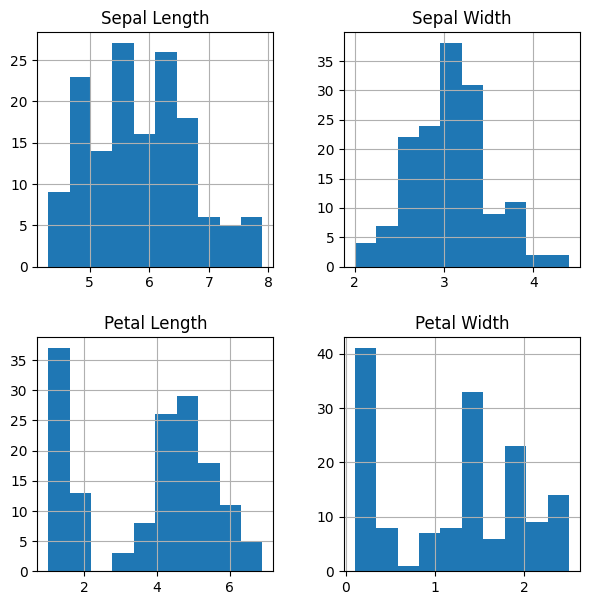

In [ ]:
hist = data.hist(figsize=(7,7))

<Axes: xlabel='Sepal Length', ylabel='Sepal Width'>

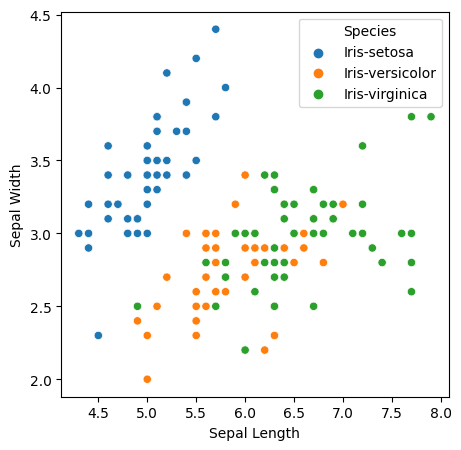

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x="Sepal Length", y="Sepal Width", hue="Species")

<Axes: xlabel='Petal Length', ylabel='Petal Width'>

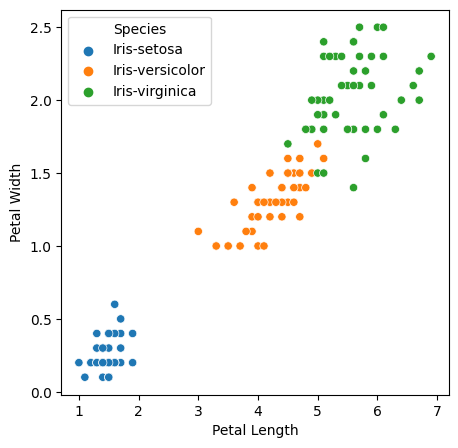

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x="Petal Length", y="Petal Width", hue="Species")

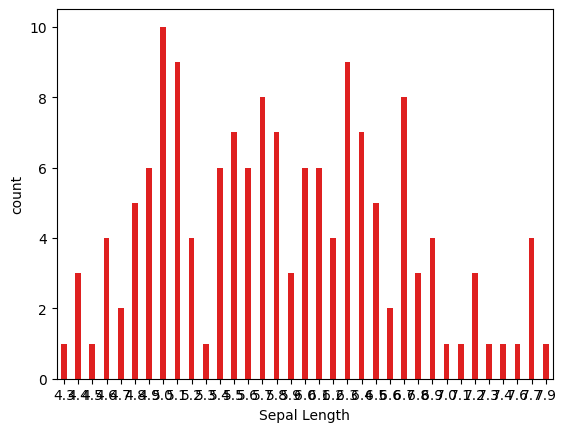

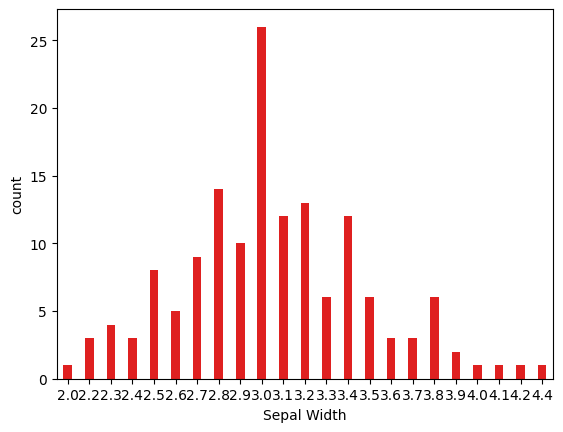

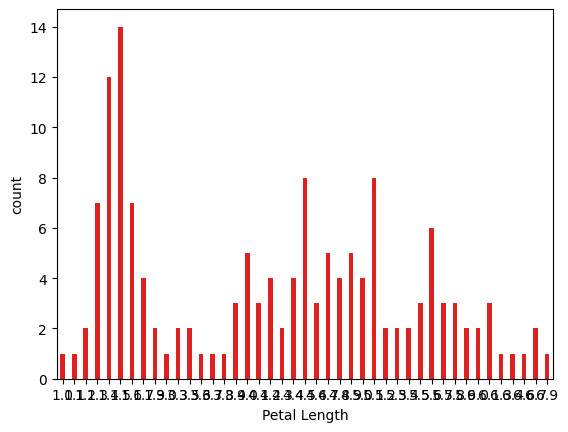

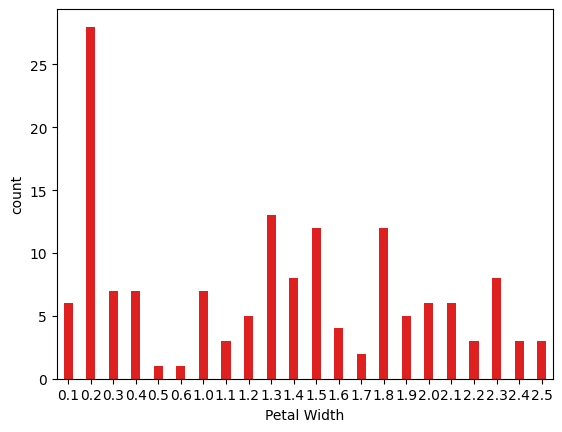

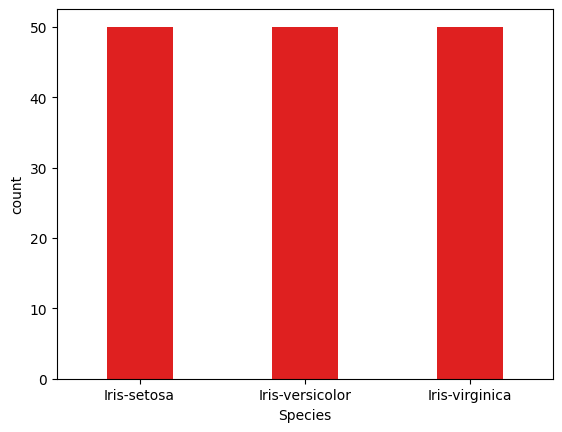

In [ ]:
for i in data.columns:
  if data[i].dtypes!="objects":
    sns.countplot(x=data[i], width=0.4, color="red")
    plt.show()

<ipython-input-19-c0e8eb04beef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p=sns.heatmap(data.corr(), annot=True, square=True)


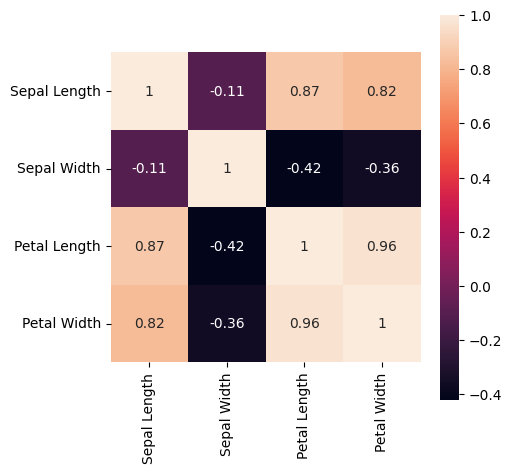

In [ ]:
plt.figure(figsize=(5,5))
p=sns.heatmap(data.corr(), annot=True, square=True)